In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sklearn

In [3]:
data = pd.read_csv('dataset.csv')

# Divide the data into training and test
training_data, testing_data = train_test_split(data, test_size=0.2, random_state = 1)

print("training data: ", training_data.shape)
print("testing data: ", testing_data.shape)

training data:  (6400, 2)
testing data:  (1600, 2)


In [4]:
nlp = spacy.load("sv_core_news_lg")

def preprocess(question):
    doc = nlp(question)
    entities = [ent.text for ent in doc.ents]
    return entities

In [5]:
# Find the maximum number of entities in the training dataset
max_entities = max([len(preprocess(row["question"])) for _, row in data.iterrows()])

In [6]:
tree = DecisionTreeClassifier()

# Load the training dataset
X_train = []
y_train = []

# Preprocess each question in the training dataset and append the resulting entities to X_train
for _, row in training_data.iterrows():
    entities = preprocess(row["question"])
    padded_entities = entities + ['0'] * (max_entities - len(entities))
    X_train.append(padded_entities)
    y_train.append(row["label"])


In [7]:
# One-hot encode the entity lists using scikit-learn's MultiLabelBinarizer
mlb = MultiLabelBinarizer()
X_train = mlb.fit_transform(X_train)

In [8]:
# Train the decision tree model
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
# Load the test dataset
X_test = []
y_test = []

# Preprocess each question in the test dataset and append the resulting entities to X_test
for _, row in testing_data.iterrows():
    entities = preprocess(row["question"])
    padded_entities = entities + ['0'] * (max_entities - len(entities))
    X_test.append(padded_entities)
    y_test.append(row["label"])

In [10]:
# One-hot encode the entity lists using the same MultiLabelBinarizer instance used to transform the training data
X_test = mlb.transform(X_test)

/Users/johannordling/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:878: UserWarning: unknown class(es) ['10 pund', '12 miljoner dollar', '3 månader', '30 pund', 'ATP', 'Abbas Gallyamov', 'Agathe Demarais', 'Aichi', 'Akhilesh Yadav', 'Aleksandr Novak', 'Aleksandr Volfovitj', 'Aleksej Navalnyj', 'Alina Sibai', 'Amerikorna', 'Amineh Kakabaveh', 'Amnesty Internationals Ukrainakontor?', 'Amphenol?', 'Anders Borg', 'Anders Borgs', 'Andrej', 'Andrews University', 'Andrius Tursa', 'Andy Warhol', 'Antergos', 'Anthony Zurcher', 'Apricity', 'Asli Aydintasbas', 'Aylin Fazelian', 'BOOTMGR', 'Bahnhofs', 'Baltops', 'Banquo Macbeth', 'Belgien', 'Ben Harris', 'Ben Hodges', 'Berklee College of Music?', 'Bern', 'Bollywood-filmen 2016', 'Boris Rapoport', 'Brian Castner', 'CIA/FBI/Försvarsmakten', 'Carnegie', 'Celeste Wallander', 'Champions', 'Charkiv', 'Chris Kempczinski', 'Christer Fuglesang', 'Claes Eliasson', 'Coca-Cola Company', 'Colaba', 'DI:s PM Nilsson', 'Dagens Indust

In [11]:
# Test the decision tree model
y_pred = tree.predict(X_test)

              precision    recall  f1-score   support

           0    0.77159   0.98460   0.86517       844
           1    0.97514   0.67460   0.79750       756

    accuracy                        0.83813      1600
   macro avg    0.87337   0.82960   0.83134      1600
weighted avg    0.86777   0.83813   0.83320      1600



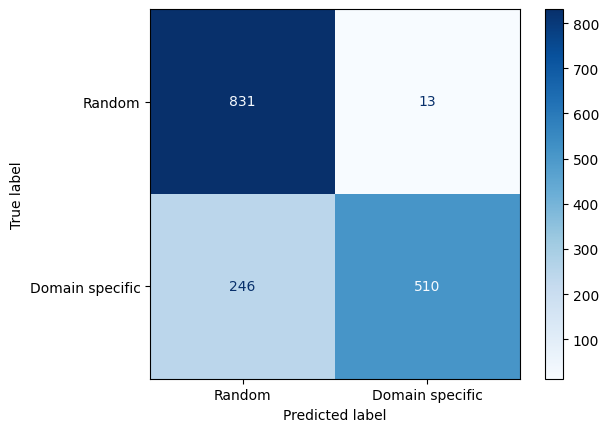

In [12]:
report = sklearn.metrics.classification_report(y_test, y_pred, digits=5)
print(report)

# Create and display a graphical confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Random', 'Domain specific'])
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

In [17]:

# Prevent truncation of text
# pd.set_option('display.max_colwidth', None)
# Show more rows
pd.set_option('display.max_rows', 350)
# Show the questions that were misclassified and their entity lists
misclassified = testing_data[testing_data["label"] != y_pred]
misclassified["entities"] = misclassified["question"].apply(preprocess)
misclassified

/var/folders/q1/vj3rtg0j2ps7rtxf7_n3mq3c0000gn/T/ipykernel_5439/342284836.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified["entities"] = misclassified["question"].apply(preprocess)


,question,label,entities
3228,"Löstes konflikten i Sudan som orsakade massakern i Darfur, etc. efter Sydsudans självständighet?",0,"[Sudan, Darfur, etc., Sydsudans]"
2745,Vad är särskilt bra med tyska granater av typen Vulcano?,1,[]
1307,Vad varnar Kyivregionens guvernör för i veckan?,1,"[Kyivregionens, i veckan]"
4941,Varför är det mentalt lättare för många att låta bli att investera sina pengar enligt Jacob Liebermann på Fundler?,1,"[Jacob Liebermann, Fundler]"
3371,Hur mycket kan Google komma att tvingas betala i böter enligt ryska tillsynsmyndigheten Roskomnadzor?,1,[Google]
...,...,...,...
2461,Hur mycket har stadens elförsörjning minskat inför den annalkande vintern enligt Yasno?,1,[]
1125,Vad säger soldaten om behovet av bättre vapen för att bekämpa ryssarna?,1,[]
6591,Vad producerar företaget Tlusty nu efter den ryska invasionen?,1,[]
5985,Vilka åtgärder har det internationella ishockeyförbundet IIHF vidtagit?,1,[IIHF]
